In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import log,dot,exp,shape
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [148]:
df = pd.read_csv("crack_detection.csv")
df.head()

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
0,0,107.5734,29.267480,0.744029,0.408828,110.2533,26.953218,1.254689,-0.135613,113.5715,...,9.181953,177.0,173.0,162.0,0.951368,0.913876,0.803333,856.585412,726.475939,0
1,1,178.6713,14.917756,3.192406,0.238175,184.4947,14.882156,3.035196,0.141160,190.8538,...,9.207314,142.0,136.0,129.0,0.988325,0.989474,0.976787,222.539456,221.478572,0
2,2,176.6517,34.618255,-0.146336,-0.421552,161.3083,33.688699,0.057178,-0.521476,147.2760,...,9.186737,199.0,200.0,194.0,0.968581,0.967398,0.890845,1198.423587,1134.928451,1
3,3,113.5760,20.084502,0.719752,0.737728,114.0056,19.536222,0.655846,0.729521,113.6179,...,9.197973,146.0,142.0,138.0,0.987383,0.983663,0.961305,403.387224,381.663969,0
4,4,125.3565,29.251595,0.430344,0.833496,129.5277,28.661968,0.475502,0.804161,131.9745,...,9.189257,173.0,176.0,177.0,0.980727,0.986702,0.950291,855.655808,821.508433,1


In [149]:
df.shape

(700, 25)

In [192]:
df.isnull().sum()

Unnamed: 0    0
mean_r        0
std_r         0
kur_r         0
skew_r        0
mean_g        0
std_g         0
kur_g         0
skew_g        0
mean_b        0
std_b         0
kur_b         0
skew_b        0
entropy_r     0
entropy_g     0
contrast_r    0
contrast_g    0
contrast_b    0
corr_rg       0
corr_rb       0
corr_gb       0
moment_r      0
moment_g      0
moment_b      0
label         0
dtype: int64

In [193]:
df.info

<bound method DataFrame.info of      Unnamed: 0    mean_r      std_r     kur_r    skew_r    mean_g      std_g  \
0             0  107.5734  29.267480  0.744029  0.408828  110.2533  26.953218   
1             1  178.6713  14.917756  3.192406  0.238175  184.4947  14.882156   
2             2  176.6517  34.618255 -0.146336 -0.421552  161.3083  33.688699   
3             3  113.5760  20.084502  0.719752  0.737728  114.0056  19.536222   
4             4  125.3565  29.251595  0.430344  0.833496  129.5277  28.661968   
..          ...       ...        ...       ...       ...       ...        ...   
695         695  147.4849  39.849040 -0.413560 -0.713162  143.8830  36.109081   
696         696  131.6387  22.462007  0.060316 -0.598803  129.3470  20.965238   
697         697  124.9098  24.410827 -0.014904  0.298252  130.4604  23.675959   
698         698  100.5366  41.107908 -0.385692  0.309762   98.8532  40.835684   
699         699  138.0759   6.627016  2.339072  0.414758  137.9345   6.328697

In [194]:
df.describe()

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,349.50000,129.904131,29.725915,0.783304,0.210021,129.513118,28.191406,0.905234,0.210064,128.842019,...,9.185198,178.245714,173.781429,170.375714,0.984945,0.982444,0.958198,978.008986,880.738813,0.498571
std,202.21688,22.533741,9.721830,2.921148,0.832188,20.781828,9.279358,3.000051,0.848674,19.436542,...,0.018515,33.888983,34.655417,35.610478,0.024409,0.027450,0.069144,565.834008,520.580605,0.500355
min,0.00000,72.085700,5.257114,-1.616288,-3.788320,78.022200,4.543611,-1.567842,-3.761659,82.738400,...,9.085941,55.000000,48.000000,52.000000,0.731441,0.740211,0.279195,27.637244,20.644398,0.000000
25%,174.75000,117.223100,21.865794,-0.520055,-0.251850,118.032050,20.951718,-0.460405,-0.247178,118.039500,...,9.177954,152.750000,150.000000,146.000000,0.984907,0.982613,0.957100,478.115830,438.975044,0.000000
50%,349.50000,127.525400,31.030772,-0.071472,0.211199,127.457500,29.333898,-0.011488,0.202783,126.579200,...,9.188351,184.500000,179.000000,175.000000,0.991413,0.989603,0.974893,962.908945,860.477925,0.000000
75%,524.25000,140.418825,37.210949,1.042058,0.593044,138.861175,34.737146,1.177957,0.613642,136.463700,...,9.199160,202.000000,197.000000,193.250000,0.994256,0.993197,0.983471,1384.654910,1206.669310,1.000000
max,699.00000,207.160800,52.226058,44.499978,5.645803,198.134400,51.168733,44.984072,5.623845,196.270800,...,9.209413,255.000000,254.000000,255.000000,0.998194,0.998387,0.997126,2727.561173,2618.239239,1.000000


In [195]:
df['label'].value_counts()

0    351
1    349
Name: label, dtype: int64

In [196]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

In [197]:
print([X.shape,Y.shape])

[(700, 24), (700, 1)]


In [198]:
def normalize(X):
  return (X - np.mean(X,axis = 0))/np.std(X,axis = 0)

In [199]:
X = normalize(X)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [201]:
X_train.shape

(560, 24)

In [202]:
y_train.shape

(560, 1)

In [203]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))

In [204]:
def forward(X,W,b):
  y = sigmoid(np.dot(X,W)+b)
  return y

In [205]:
def predict(X,W,b):
  predicted = sigmoid(np.dot(X,W)+b)
  y = np.where(predicted>0.5,1,0)
  return y

In [206]:
def costFunct(y,y_hat):
  l = -np.mean(np.log(y_hat)*y + np.log(1-y_hat)*(1-y))
  return l

In [207]:
def gradient(X,Y,W,b):
  m = X.shape[0]
  y_hat = np.expand_dims(forward(X,W,b),axis =1)
  dw = ((1/m)*np.dot(X.T, (y_hat - Y))).squeeze()
  db = (1/m)*(np.sum((y_hat - Y)))
  return dw,db

In [208]:
def BinarylogRegClassifier(X,Y,num_iter,learning_rate=0.001):
  m,n = X.shape
  W = np.random.random((n))
  b = np.random.random(1)
  losses = []

  for i in range(num_iter):
    Y_hat = forward(X,W,b)
    losses.append([i,costFunct(Y,Y_hat)])
    dw,db = gradient(X,Y,W,b)
    W -= learning_rate*dw
    b -= learning_rate*db

  return losses,W,b

In [209]:
losses,W,b = BinarylogRegClassifier(X_train,y_train,10)

In [210]:
losses = np.asarray(losses)

In [211]:
losses.shape

(10, 2)

In [212]:
epochs = losses[:,0]
loss = losses[:,1]

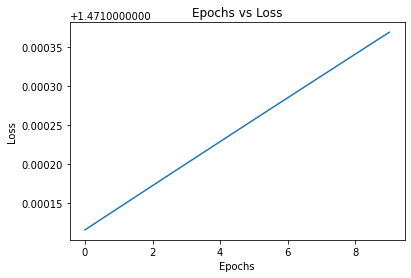

In [213]:
plt.plot(epochs,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.show()

In [214]:
def accuracyCalculator(y,y_hat):
  summ = 0
  for i in range(len(y)):
    if(y[i]==y_hat[i]):
      summ += 1
  accuracy = summ/len(y)
  return accuracy

In [215]:
predictions = predict(X_test,W,b)

In [216]:
predictions

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

In [217]:
accuracyCalculator(y_test,predictions)

0.6428571428571429

In [218]:
from sklearn.linear_model import LogisticRegression
logisticRegressor = LogisticRegression()

In [219]:
logisticRegressor.fit(X_train,y_train.ravel())

LogisticRegression()

In [220]:
logisticRegressor.score(X_test,y_test)

0.8785714285714286

In [221]:
logisticRegressor.score(X_train,y_train)

0.8517857142857143

In [222]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [223]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8)

In [224]:
X_train.shape

(420, 24)

In [225]:
y_train.shape

(420,)

In [226]:
X_test.shape

(140, 24)

In [227]:
y_test.shape

(140,)

In [228]:
X_valid.shape

(140, 24)

In [229]:
y_valid.shape

(140,)

In [230]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)          

y_pred = svc.predict(X_test)

In [231]:
print('F1 Score: %.2f' % f1_score(y_test, y_pred))

F1 Score: 0.86


In [232]:
accuracy_score(y_test,y_pred)

0.8642857142857143